#Brain MRI Image classification for Brain Tumor Detection

##In this exercise, we'll be performing a binary classification of multiple MRI brain scans using a Convolutional Neural Network (CNN) trained to idenfity possible brain tumor abnormalities in brain scans and identify the existence of tumors by a binary classification of scan having a tumor('yes') or not having a tumor('no')

#By : Karthik Sabareesh


Github: https://github.com/KarthikSabareesh

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir =  '/content/drive/MyDrive/brain_tumor_dataset'
img_height, img_width = 224,224
batch_size = 32

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  label_mode='binary',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  interpolation='nearest',
  batch_size=batch_size)

valid_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  label_mode='binary',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  interpolation='nearest',
  batch_size=batch_size)

print(train_data)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


In [ ]:
rescale = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=[img_height, img_width, 3])
])

In [ ]:
tf.random.set_seed(42)

model = keras.Sequential([

    rescale,

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=(4,4), activation="relu", padding='valid'),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='valid'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='valid'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(units=32, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 221, 221, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)      

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

AUTOTUNE = tf.data.AUTOTUNE

train_data_preprocess = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_data_preprocess = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3),ModelCheckpoint(filepath='mymodel.h6',verbose=2, save_best_only=True)]

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    train_data_preprocess,
    validation_data=valid_data_preprocess,
    epochs=30,
    verbose=1,
    callbacks=callbacks,
)

Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 0.6811 - binary_accuracy: 0.5665
Epoch 1: val_loss improved from inf to 0.64403, saving model to mymodel.h6


7/7 [==============================] - 42s 3s/step - loss: 0.6811 - binary_accuracy: 0.5665 - val_loss: 0.6440 - val_binary_accuracy: 0.7600
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 0.6238 - binary_accuracy: 0.7044
Epoch 2: val_loss improved from 0.64403 to 0.57469, saving model to mymodel.h6


7/7 [==============================] - 19s 3s/step - loss: 0.6238 - binary_accuracy: 0.7044 - val_loss: 0.5747 - val_binary_accuracy: 0.7400
Epoch 3/30
7/7 [==============================] - ETA: 0s - loss: 0.5643 - binary_accuracy: 0.7438
Epoch 3: val_loss improved from 0.57469 to 0.53490, saving model to mymodel.h6


7/7 [==============================] - 20s 3s/step - loss: 0.5643 - binary_accuracy: 0.7438 - val_loss: 0.5349 - val_binary_accuracy: 0.8000
Epoch 4/30
7/7 [==============================] - ETA: 0s - loss: 0.4956 - binary_accuracy: 0.7635
Epoch 4: val_loss did not improve from 0.53490
7/7 [==============================] - 17s 2s/step - loss: 0.4956 - binary_accuracy: 0.7635 - val_loss: 0.5884 - val_binary_accuracy: 0.8000
Epoch 5/30
7/7 [==============================] - ETA: 0s - loss: 0.4544 - binary_accuracy: 0.8030
Epoch 5: val_loss did not improve from 0.53490
7/7 [==============================] - 19s 3s/step - loss: 0.4544 - binary_accuracy: 0.8030 - val_loss: 0.5632 - val_binary_accuracy: 0.8400
Epoch 6/30
7/7 [==============================] - ETA: 0s - loss: 0.4690 - binary_accuracy: 0.8227
Epoch 6: val_loss improved from 0.53490 to 0.53239, saving model to mymodel.h6


7/7 [==============================] - 18s 3s/step - loss: 0.4690 - binary_accuracy: 0.8227 - val_loss: 0.5324 - val_binary_accuracy: 0.8400
Epoch 7/30
7/7 [==============================] - ETA: 0s - loss: 0.4139 - binary_accuracy: 0.8276
Epoch 7: val_loss did not improve from 0.53239
7/7 [==============================] - 17s 2s/step - loss: 0.4139 - binary_accuracy: 0.8276 - val_loss: 0.6691 - val_binary_accuracy: 0.8400
Epoch 8/30
7/7 [==============================] - ETA: 0s - loss: 0.3729 - binary_accuracy: 0.8522
Epoch 8: val_loss did not improve from 0.53239
7/7 [==============================] - 18s 2s/step - loss: 0.3729 - binary_accuracy: 0.8522 - val_loss: 0.6239 - val_binary_accuracy: 0.8400
Epoch 9/30
7/7 [==============================] - ETA: 0s - loss: 0.4256 - binary_accuracy: 0.8522
Epoch 9: val_loss did not improve from 0.53239
7/7 [==============================] - 18s 3s/step - loss: 0.4256 - binary_accuracy: 0.8522 - val_loss: 0.5521 - val_binary_accuracy: 0.860

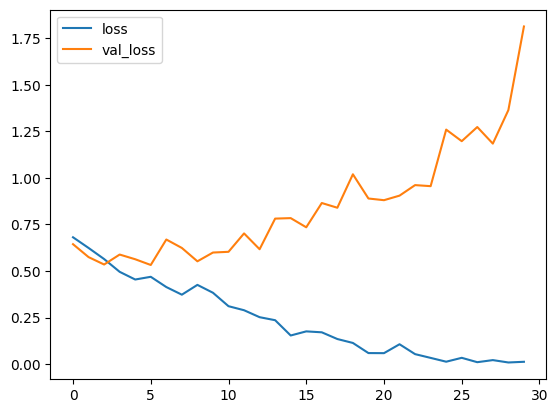

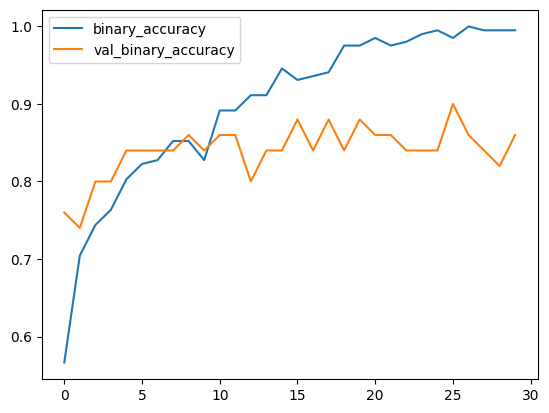

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

Note : model is overfitting here, we can try building a better, different model

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import accuracy_score,f1_score,classification_report


CLASSES = train_data.class_names
probabilities = model.predict(valid_data_preprocess)
print(probabilities)

predictions = [1 if i >0.5 else 0 for i in probabilities]
print(predictions)
unbatched_valid_ds_preprocess = valid_data_preprocess.unbatch()
labels_valid = [int(i[1]) for i in unbatched_valid_ds_preprocess]
print(labels_valid)
list_labels_predictions = np.vstack((labels_valid,predictions)).T
conf_matrix = np.zeros([2,2])

for i,j in list_labels_predictions:
    conf_matrix[i,j] +=1

accuracy = accuracy_score(labels_valid, predictions)
f1 = f1_score(labels_valid, predictions)
print('Val Accuracy: %.2f' % accuracy)
print('Val F1 Score: %.2f' % f1)
print('False positive: %.2f' % (conf_matrix[0,1]/len(predictions)))
print('False negative: %.2f' % (conf_matrix[1,0]/len(predictions)))

2/2 [==============================] - 2s 575ms/step
[[1.0000000e+00]
 [1.0000000e+00]
 [9.9335134e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999398e-01]
 [9.9995887e-01]
 [9.9999231e-01]
 [9.9995136e-01]
 [2.4346761e-20]
 [7.4140042e-01]
 [1.1852291e-17]
 [9.9999416e-01]
 [9.9995792e-01]
 [4.9969205e-15]
 [9.9840307e-01]
 [9.9363250e-01]
 [4.2276451e-04]
 [1.5729300e-11]
 [3.1129378e-01]
 [9.6050251e-01]
 [9.9998510e-01]
 [6.3189627e-12]
 [9.9999720e-01]
 [9.9999923e-01]
 [1.0000000e+00]
 [9.9807054e-01]
 [9.9999934e-01]
 [9.9468702e-01]
 [1.0000000e+00]
 [9.9999851e-01]
 [8.6917102e-01]
 [9.9999964e-01]
 [9.9953806e-01]
 [5.2573938e-07]
 [2.6410355e-05]
 [9.9922919e-01]
 [9.8931628e-01]
 [9.0099901e-22]
 [9.6534067e-01]
 [2.7515721e-08]
 [2.0868221e-07]
 [9.9999994e-01]
 [1.6394441e-06]
 [1.0000000e+00]
 [2.4230045e-14]
 [8.4618193e-07]
 [9.9966687e-01]
 [9.9965477e-01]
 [9.9999857e-01]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

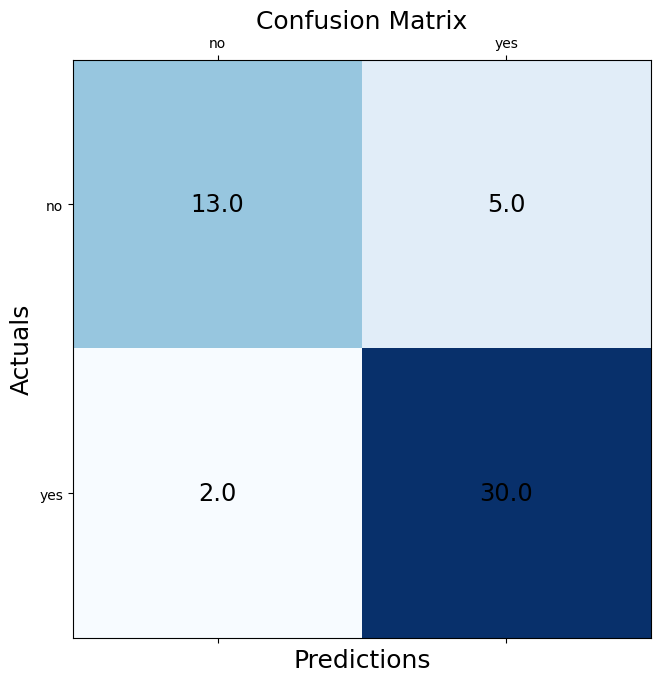

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.86      0.94      0.90        32

    accuracy                           0.86        50
   macro avg       0.86      0.83      0.84        50
weighted avg       0.86      0.86      0.86        50



In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

ax.set_yticks([0,1])
ax.set_yticklabels(CLASSES)
ax.set_xticks([0,1])
ax.set_xticklabels(CLASSES)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


print(classification_report(labels_valid,predictions))